In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
concatenated_df = pd.read_pickle('./concatenated_df_oct.pkl')
age = pd.read_pickle('./age_oct.pkl')

,Wave,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Stage,Channel,IdxChannel,Group,Subject,Session,Age,Machine


In [55]:
# Subsets data
crs1 = concatenated_df['Session']==1
crs2 = concatenated_df['Session']==2
crs3 = concatenated_df['Session']==3
crs4 = concatenated_df['Session']==4

cri1 = concatenated_df['Group'] == 'C'
cri2 = concatenated_df['Group'] == 'E'
cri3 = concatenated_df['Group'] == 'S'
criC = cri1 & crs1
criE = cri2 & crs1
criS = cri3 & crs1

# Only data from session 1
data = concatenated_df[crs1]
# Add confusional arousals
cfsubj = ['E02','E03','E05','E06','E07','E16','E21','E22','C05','C12','C14','C18']
data['ConfArousal'] = 0
data.loc[concatenated_df.Subject.isin(cfsubj),'ConfArousal'] = 1
data.loc[:,'ConfArousal'] = data.loc[:,'ConfArousal'].astype('category')
# Data all groups sessions 1-4
data4 = concatenated_df[(crs1 | crs2 | crs3 | crs4)]
# Data encephalitis for 4 sessions
cridataE = cri1 & (crs1 | crs2 | crs3 | crs4)
dataE = concatenated_df[cridataE]

# select frontal and posterior channels
chan_fp = ['Fp1', 'Fpz', 'Fp2', 'AF7', 'AFz', 'AF8', 'F7', 'F3','Fz', 'F4', 'F8', 'P3', 'Pz', 'P4', 'PO7', 'PO3', 
           'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']
data_fp = concatenated_df[concatenated_df.Channel.isin(chan_fp)]

# add column indicating whether frontal or posterior electrode
chan_p = ['P3', 'Pz', 'P4', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']
data_fp['Position'] = 'F'
data_fp.loc[data_fp.Channel.isin(chan_p),'Position'] = 'P'
data_fp.loc[:,'Session'] = data_fp.loc[:,'Session'].astype(int)

# Subsets A/P data
crC = data_fp['Group'] == 'C'
crE = data_fp['Group'] == 'E'
crE1 = data_fp['Session'] == 1
crE2 = data_fp['Session'] == 2
crE3 = data_fp['Session'] == 3
crE4 = data_fp['Session'] == 4

data_fp1 = data_fp[crE1]
data4 = data_fp[(crE1 | crE2 | crE3 | crE4)]
dataE_fp = data_fp[crE & (crE1 | crE2 | crE3 | crE4)]
dataCE_fp = data_fp[(crE | crC) & (crE1 | crE2 | crE3 | crE4)]

/tmp/ipykernel_434712/3198119794.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ConfArousal'] = 0
/tmp/ipykernel_434712/3198119794.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fp['Position'] = 'F'


## Individual plots

ValueError: not enough values to unpack (expected 2, got 0)

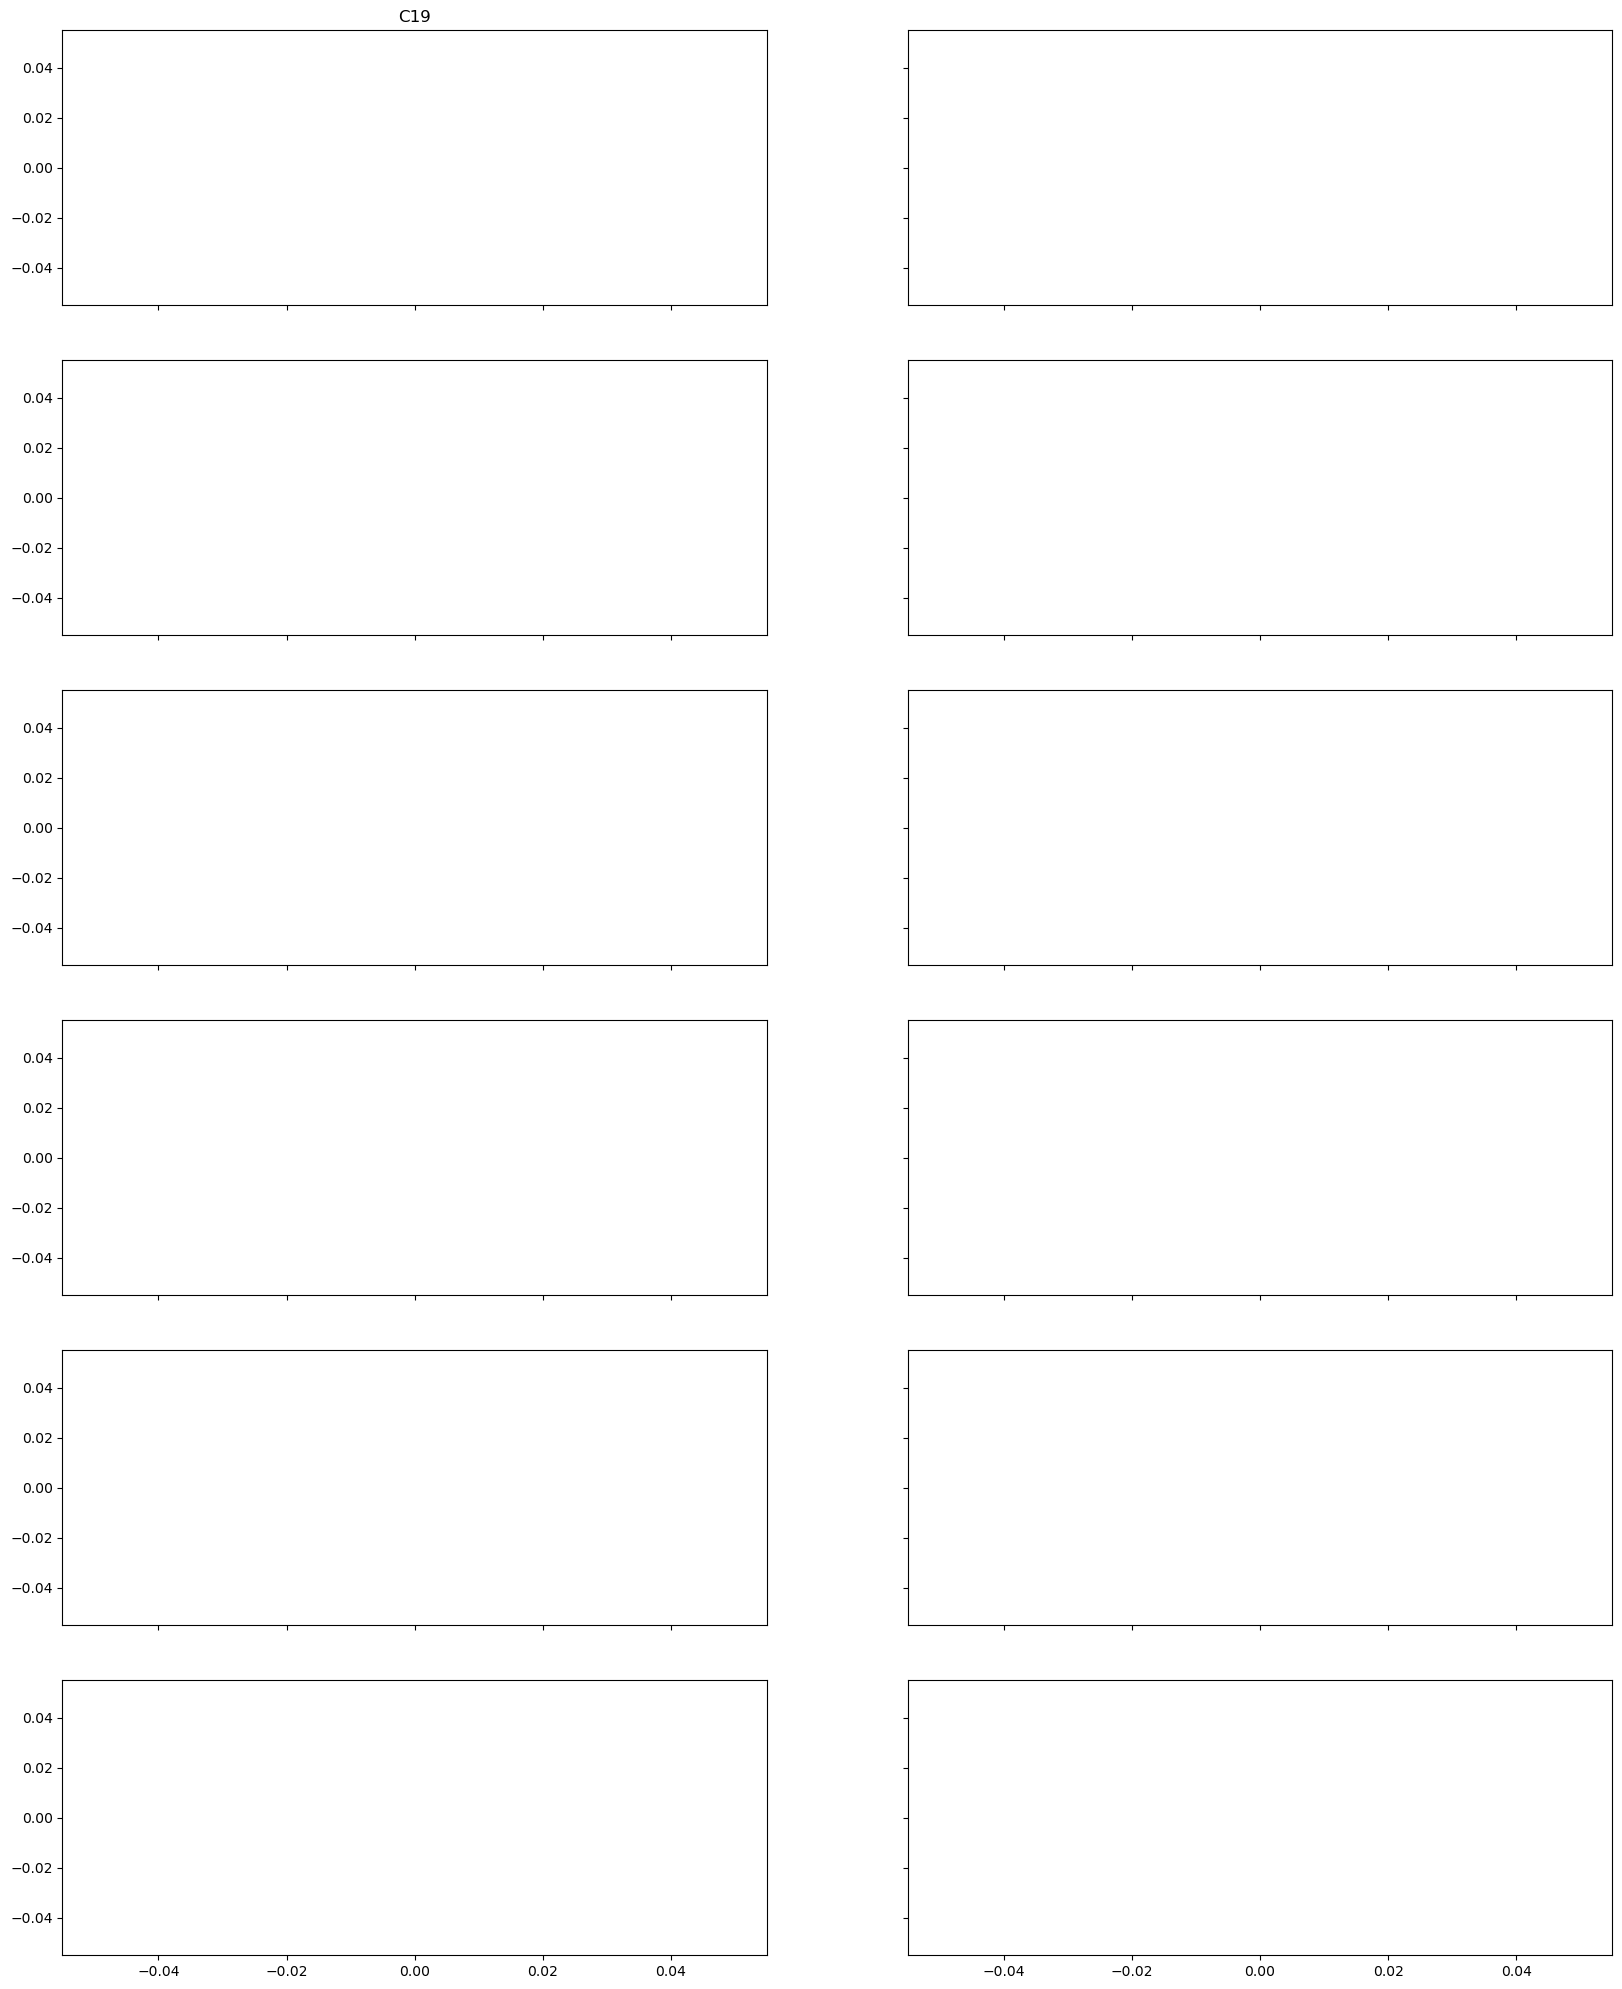

In [56]:
fig, ax = plt.subplots(6, 2, figsize = (20, 25), sharex = 'all', sharey = 'all')



### DATA
dataC19 = data[data['Subject']=='C19'].sort_values(by=['Start']).reset_index(drop=True)
dataC19['Time'] = pd.to_datetime(dataC19['Start'],unit = 'h')
dataC19 = dataC19.set_index('Time')
rmean1 = dataC19.Slope.rolling('60s').mean()
dataC16 = data[data['Subject']=='C16'].sort_values(by=['Start']).reset_index(drop=True)
dataC16['Time'] = pd.to_datetime(dataC16['Start'],unit = 'h')
dataC16 = dataC16.set_index('Time')
rmean2 = dataC16.Slope.rolling('60s').mean()
dataE04 = data[data['Subject']=='E04'].sort_values(by=['Start']).reset_index(drop=True)
dataE04['Time'] = pd.to_datetime(dataE04['Start'],unit = 'h')
dataE04 = dataE04.set_index('Time')
rmean3 = dataE04.Slope.rolling('60s').mean()
dataE11 = data[data['Subject']=='E11'].sort_values(by=['Start']).reset_index(drop=True)
dataE11['Time'] = pd.to_datetime(dataE11['Start'],unit = 'h')
dataE11 = dataE11.set_index('Time')
rmean4 = dataE11.Slope.rolling('60s').mean()
dataS02 = data[data['Subject']=='S02'].sort_values(by=['Start']).reset_index(drop=True)
dataS02['Time'] = pd.to_datetime(dataS02['Start'],unit = 'h')
dataS02 = dataS02.set_index('Time')
rmean5 = dataS02.Slope.rolling('60s').mean()
dataS05 = data[data['Subject']=='S05'].sort_values(by=['Start']).reset_index(drop=True)
dataS05['Time'] = pd.to_datetime(dataS05['Start'],unit = 'h')
dataS05 = dataS05.set_index('Time')
rmean6 = dataS05.Slope.rolling('60s').mean()

##############################################################

dataC19Fz = dataC19[dataC19['Channel']=='Fz'].reset_index(drop=True)
dataC19Fz['Time'] = pd.to_datetime(dataC19Fz['Start'],unit = 'h')
dataC19Fz = dataC19Fz.set_index('Time')
rmean1Fz = dataC19Fz.Slope.rolling('60s').mean()
dataC16Fz = dataC16[dataC16['Channel']=='Fz'].reset_index(drop=True)
dataC16Fz['Time'] = pd.to_datetime(dataC16Fz['Start'],unit = 'h')
dataC16Fz = dataC16Fz.set_index('Time')
rmean2Fz = dataC16Fz.Slope.rolling('60s').mean()
dataE04Fz = dataE04[dataE04['Channel']=='Fz'].reset_index(drop=True)
dataE04Fz['Time'] = pd.to_datetime(dataE04Fz['Start'],unit = 'h')
dataE04Fz = dataE04Fz.set_index('Time')
rmean3Fz = dataE04Fz.Slope.rolling('60s').mean()
dataE11Fz = dataE11[dataE11['Channel']=='Fz'].reset_index(drop=True)
dataE11Fz['Time'] = pd.to_datetime(dataE11Fz['Start'],unit = 'h')
dataE11Fz = dataE11Fz.set_index('Time')
rmean4Fz = dataE11Fz.Slope.rolling('60s').mean()
dataS02Fz = dataS02[dataS02['Channel']=='Fz'].reset_index(drop=True)
dataS02Fz['Time'] = pd.to_datetime(dataS02Fz['Start'],unit = 'h')
dataS02Fz = dataS02Fz.set_index('Time')
rmean5Fz = dataS02Fz.Slope.rolling('60s').mean()
dataS05Fz = dataS05[dataS05['Channel']=='Fz'].reset_index(drop=True)
dataS05Fz['Time'] = pd.to_datetime(dataS05Fz['Start'],unit = 'h')
dataS05Fz = dataS05Fz.set_index('Time')
rmean6Fz = dataS05Fz.Slope.rolling('60s').mean()

# Plot individuals with running mean
ax[0][0].set_title('C19')
ax[0][0].scatter(dataC19['Start'], dataC19['Slope'])
x, mean = zip(*sorted(zip(dataC19['Start'], rmean1),key=lambda x: x[0]))
ax[0][0].plot(x, mean, color='indianred')
ax[0][0].tick_params(axis='both', labelbottom = True)

ax[1][0].set_title('C16')
ax[1][0].scatter(dataC16['Start'], dataC16['Slope'])
x, mean = zip(*sorted(zip(dataC16['Start'], rmean2),key=lambda x: x[0]))
ax[1][0].plot(x, mean, color='indianred')
ax[1][0].tick_params(axis='both', labelbottom = True)

ax[2][0].set_title('E04')
ax[2][0].scatter(dataE04['Start'], dataE04['Slope'])
x, mean = zip(*sorted(zip(dataE04['Start'], rmean3),key=lambda x: x[0]))
ax[2][0].plot(x, mean, color='indianred')
ax[2][0].tick_params(axis='both', labelbottom = True)

ax[3][0].set_title('E11')
ax[3][0].scatter(dataE11['Start'], dataE11['Slope'])
x, mean = zip(*sorted(zip(dataE11['Start'], rmean4),key=lambda x: x[0]))
ax[3][0].plot(x, mean, color='indianred')
ax[3][0].tick_params(axis='both', labelbottom = True)

ax[4][0].set_title('S02')
ax[4][0].scatter(dataS02['Start'], dataS02['Slope'])
x, mean = zip(*sorted(zip(dataS02['Start'], rmean5),key=lambda x: x[0]))
ax[4][0].plot(x, mean, color='indianred')
ax[4][0].tick_params(axis='both', labelbottom = True)

ax[5][0].set_title('S05')
ax[5][0].scatter(dataS05['Start'], dataS05['Slope'])
x, mean = zip(*sorted(zip(dataS05['Start'], rmean6),key=lambda x: x[0]))
ax[5][0].plot(x, mean, color='indianred')

##############################################################

ax[0][1].set_title('C19')
ax[0][1].scatter(dataC19Fz['Start'], dataC19Fz['Slope'])
x, mean = zip(*sorted(zip(dataC19Fz['Start'], rmean1Fz),key=lambda x: x[0]))
ax[0][1].plot(x, mean, color='indianred')
ax[0][1].tick_params(axis='both', labelbottom = True)

ax[1][1].set_title('C16')
ax[1][1].scatter(dataC16Fz['Start'], dataC16Fz['Slope'])
x, mean = zip(*sorted(zip(dataC16Fz['Start'], rmean2Fz),key=lambda x: x[0]))
ax[1][1].plot(x, mean, color='indianred')
ax[1][1].tick_params(axis='both', labelbottom = True)

ax[2][1].set_title('E04')
ax[2][1].scatter(dataE04Fz['Start'], dataE04Fz['Slope'])
x, mean = zip(*sorted(zip(dataE04Fz['Start'], rmean3Fz),key=lambda x: x[0]))
ax[2][1].plot(x, mean, color='indianred')
ax[2][1].tick_params(axis='both', labelbottom = True)

ax[3][1].set_title('E11')
ax[3][1].scatter(dataE11Fz['Start'], dataE11Fz['Slope'])
x, mean = zip(*sorted(zip(dataE11Fz['Start'], rmean4Fz),key=lambda x: x[0]))
ax[3][1].plot(x, mean, color='indianred')
ax[3][1].tick_params(axis='both', labelbottom = True)

ax[4][1].set_title('S02')
ax[4][1].scatter(dataS02Fz['Start'], dataS02Fz['Slope'])
x, mean = zip(*sorted(zip(dataS02Fz['Start'], rmean5Fz),key=lambda x: x[0]))
ax[4][1].plot(x, mean, color='indianred')
ax[4][1].tick_params(axis='both', labelbottom = True)

ax[5][1].set_title('S05')
ax[5][1].scatter(dataS05Fz['Start'], dataS05Fz['Slope'])
x, mean = zip(*sorted(zip(dataS05Fz['Start'], rmean6Fz),key=lambda x: x[0]))
ax[5][1].plot(x, mean, color='indianred')


plt.savefig('individualplots.png')

## FIRST SLOPE DETECTION

In [ ]:
##### ALL FRONTAL ELECTRODES

data_CF = data_fp[(data_fp['Position'] == 'F') & (data_fp['Group'] == 'C')] 
data_EF = data_fp[(data_fp['Position'] == 'F') & (data_fp['Group'] == 'E')] 
data_SF = data_fp[(data_fp['Position'] == 'F') & (data_fp['Group'] == 'S')] 
data_F = data_fp[data_fp['Position'] == 'F']

print(len(data_CF))
print(len(data_EF))
print(len(data_SF))
print(len(data_F))

434480
773280
400237
1607997


In [ ]:
# Calculate the minimum Start time within each group
start_times = data_F.groupby(['Subject', 'Session'])['Start'].transform('min')

# Subtract the start time from the 'time' column
data_F['time_rel'] = data_F['Start'] - start_times

/tmp/ipykernel_434712/4029057648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_F['time_rel'] = data_F['Start'] - start_times


In [ ]:
data_F.head(9)

,Wave,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Stage,Channel,IdxChannel,Group,Subject,Session,Age,Machine,Position,time_rel
2546875,0,0.263417,948.93,949.21,949.37,949.52,1.22,-99.451261,40.264333,139.715594,498.984264,0.819672,2,Fp1,0,C,C02,1,22.91,O,F,0.000000
2548947,2072,0.263503,948.91,949.11,949.34,949.54,0.93,-47.567302,57.325832,104.893134,524.465670,1.075269,2,Fpz,1,C,C02,1,22.91,O,F,0.000086
2563022,16147,0.390689,1406.81,1407.16,1407.77,1408.12,1.64,-54.438037,56.538966,110.977003,317.077151,0.609756,2,F4,9,C,C02,1,22.91,O,F,0.127272
2558333,11458,0.391044,1408.03,1408.31,1408.67,1409.26,1.50,-59.791872,41.681846,101.473718,362.406135,0.666667,2,F7,6,C,C02,1,22.91,O,F,0.127628
2561230,14355,0.393181,1415.75,1416.35,1416.68,1416.93,1.48,-43.574775,38.377907,81.952683,136.587804,0.675676,2,Fz,8,C,C02,1,22.91,O,F,0.129764
2558334,11459,0.393536,1417.03,1417.28,1417.47,1417.69,0.96,-82.223783,45.544797,127.768579,511.074318,1.041667,2,F7,6,C,C02,1,22.91,O,F,0.130119
2548948,2073,0.393578,1417.07,1417.25,1417.44,1417.62,0.74,-55.030054,51.380799,106.410853,591.171404,1.351351,2,Fpz,1,C,C02,1,22.91,O,F,0.130161
2546876,1,0.394919,1421.97,1422.16,1422.49,1422.86,1.15,-42.726325,104.524940,147.251265,775.006660,0.869565,2,Fp1,0,C,C02,1,22.91,O,F,0.131503
2552987,6112,0.394931,1422.02,1422.27,1422.50,1423.19,1.44,-60.000797,46.061721,106.062519,424.250074,0.694444,2,AF7,3,C,C02,1,22.91,O,F,0.131514


In [ ]:
data_allF = data_F[data_F['time_rel'] <= 1]
data_allF.head()

,Wave,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Stage,Channel,IdxChannel,Group,Subject,Session,Age,Machine,Position,time_rel
2546875,0,0.263417,948.93,949.21,949.37,949.52,1.22,-99.451261,40.264333,139.715594,498.984264,0.819672,2,Fp1,0,C,C02,1,22.91,O,F,0.000000
2548947,2072,0.263503,948.91,949.11,949.34,949.54,0.93,-47.567302,57.325832,104.893134,524.465670,1.075269,2,Fpz,1,C,C02,1,22.91,O,F,0.000086
2563022,16147,0.390689,1406.81,1407.16,1407.77,1408.12,1.64,-54.438037,56.538966,110.977003,317.077151,0.609756,2,F4,9,C,C02,1,22.91,O,F,0.127272
2558333,11458,0.391044,1408.03,1408.31,1408.67,1409.26,1.50,-59.791872,41.681846,101.473718,362.406135,0.666667,2,F7,6,C,C02,1,22.91,O,F,0.127628
2561230,14355,0.393181,1415.75,1416.35,1416.68,1416.93,1.48,-43.574775,38.377907,81.952683,136.587804,0.675676,2,Fz,8,C,C02,1,22.91,O,F,0.129764


In [ ]:

# Group by 'Name', apply cut and mean
bins_data_F = data_allF.copy()
bins_data_F['time_rel'] = pd.cut(data_allF['time_rel'], bins=30)  # Adjust the number of bins as needed
bins_data_F = bins_data_F.groupby(['Session','Subject','time_rel'])['Slope'].mean().reset_index()
bins_data_F['Group'] = bins_data_F['Subject'].str[0]
bins_data_F.head()



/tmp/ipykernel_434712/708054398.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins_data_F = bins_data_F.groupby(['Session','Subject','time_rel'])['Slope'].mean().reset_index()


,Session,Subject,time_rel,Slope,Group
0,1,C02,"(-0.001, 0.0333]",511.724967,C
1,1,C02,"(0.0333, 0.0667]",NaN,C
2,1,C02,"(0.0667, 0.1]",NaN,C
3,1,C02,"(0.1, 0.133]",458.847946,C
4,1,C02,"(0.133, 0.167]",473.187585,C


In [ ]:
print(list(bins_data_F.columns))
mean_data_F = bins_data_F.groupby(['Group','time_rel'])['Slope'].mean().reset_index()
mean_data_F

['Session', 'Subject', 'time_rel', 'Slope', 'Group']


/tmp/ipykernel_434712/1941029846.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data_F = bins_data_F.groupby(['Group','time_rel'])['Slope'].mean().reset_index()


,Group,time_rel,Slope
0,C,"(-0.001, 0.0333]",435.377155
1,C,"(0.0333, 0.0667]",414.774255
2,C,"(0.0667, 0.1]",409.496320
3,C,"(0.1, 0.133]",423.309492
4,C,"(0.133, 0.167]",458.355272
...,...,...,...
85,S,"(0.833, 0.867]",508.952211
86,S,"(0.867, 0.9]",498.913448
87,S,"(0.9, 0.933]",498.572297
88,S,"(0.933, 0.967]",515.253692


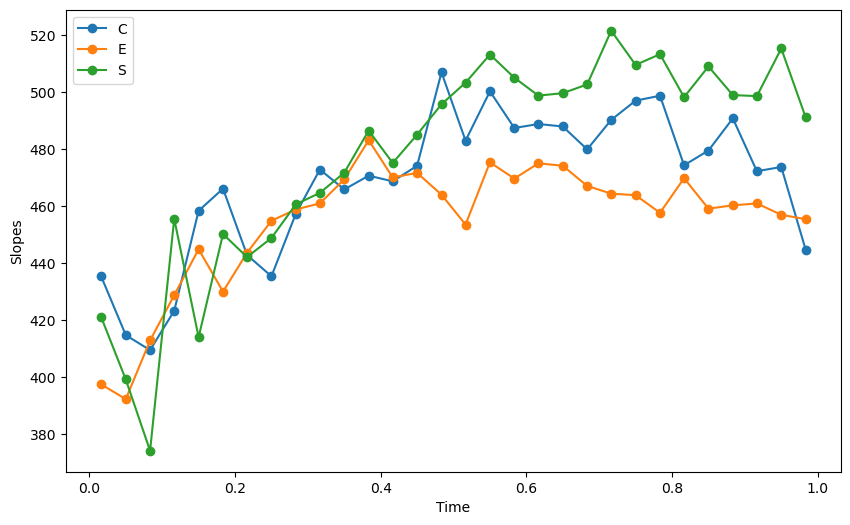

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the individual curves for each name
mean_data_F["time_rel_c"] = mean_data_F["time_rel"].apply(lambda x: x.mid)
time_intervals = mean_data_F['time_rel_c'].unique()
for name, group in mean_data_F.groupby('Group'):
    plt.plot(time_intervals, group['Slope'], marker='o', label=name)

plt.xlabel('Time')
plt.ylabel('Slopes')
plt.legend()
plt.show()